In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pickle
from sklearn.metrics import mean_squared_error

In [2]:
#data = pd.read_csv(r"E:\CDAC\Project\Pune.csv")
#from google.colab import drive
#drive.mount('/content/drive')
# Load the file from Google Drive
#data = pd.read_csv("/content/drive/MyDrive/Datasets - Colab/Pune.csv")
data=pd.read_csv('/kaggle/input/temp-data/Amritsar.csv')

In [3]:
#checking columns
data.columns

Index(['Date', 'PS', 'PSC', 'T2M', 'T2MWET', 'T2MDEW', 'WS2M', 'WD2M', 'WD10M',
       'WS10M', 'QV2M', 'RH2M', 'PRECTOTCORR', 'Latitude', 'Longitude'],
      dtype='object')

In [4]:
#dropping unrequired features
data=data.drop(['T2MDEW', 'T2MWET', 'PS', 'PSC', 'WS2M', 'QV2M', 'Latitude', 'Longitude', 'RH2M', 'PRECTOTCORR', 'WD2M', 'WD10M', 'WS10M'], axis=1)
data.head()

,Date,T2M
0,2004010109,10.99
1,2004010114,19.65
2,2004010406,4.01
3,2004010408,8.37
4,2004010410,15.03


In [5]:
# convert the date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d%H')
data.head()

,Date,T2M
0,2004-01-01 09:00:00,10.99
1,2004-01-01 14:00:00,19.65
2,2004-01-04 06:00:00,4.01
3,2004-01-04 08:00:00,8.37
4,2004-01-04 10:00:00,15.03


In [6]:
#changing index to date
data.index = data['Date']
data.head()

,Date,T2M
Date,,
2004-01-01 09:00:00,2004-01-01 09:00:00,10.99
2004-01-01 14:00:00,2004-01-01 14:00:00,19.65
2004-01-04 06:00:00,2004-01-04 06:00:00,4.01
2004-01-04 08:00:00,2004-01-04 08:00:00,8.37
2004-01-04 10:00:00,2004-01-04 10:00:00,15.03


In [7]:
data=data.sort_index()

In [8]:
data.head()

,Date,T2M
Date,,
2004-01-01 05:00:00,2004-01-01 05:00:00,6.35
2004-01-01 06:00:00,2004-01-01 06:00:00,5.91
2004-01-01 07:00:00,2004-01-01 07:00:00,6.35
2004-01-01 08:00:00,2004-01-01 08:00:00,9.15
2004-01-01 09:00:00,2004-01-01 09:00:00,10.99


In [9]:
#Renaming columns
data.rename(columns={'T2M': 'TEMP'}, inplace=True)

In [10]:
#checking for duplicated entried
data.duplicated().sum()

120

In [11]:
#dropping duplicate values
data=data.drop_duplicates()
data.duplicated().sum()

0

In [12]:
data.tail()

,Date,TEMP
Date,,
2024-02-19 00:00:00,2024-02-19 00:00:00,15.47
2024-02-19 01:00:00,2024-02-19 01:00:00,15.64
2024-02-19 02:00:00,2024-02-19 02:00:00,16.21
2024-02-19 03:00:00,2024-02-19 03:00:00,17.04
2024-02-19 04:00:00,2024-02-19 04:00:00,17.11


In [13]:
data=data[:-5]
data.tail()

,Date,TEMP
Date,,
2024-02-18 19:00:00,2024-02-18 19:00:00,17.30
2024-02-18 20:00:00,2024-02-18 20:00:00,16.57
2024-02-18 21:00:00,2024-02-18 21:00:00,15.98
2024-02-18 22:00:00,2024-02-18 22:00:00,15.76
2024-02-18 23:00:00,2024-02-18 23:00:00,15.52


In [14]:
data.count()

Date    176491
TEMP    176491
dtype: int64

In [15]:
# Splitting data into train and test sets
train_data = data[:8760]  # 1 year data
test_data = data[8760:8808]   # Use the last 48 hours for testing

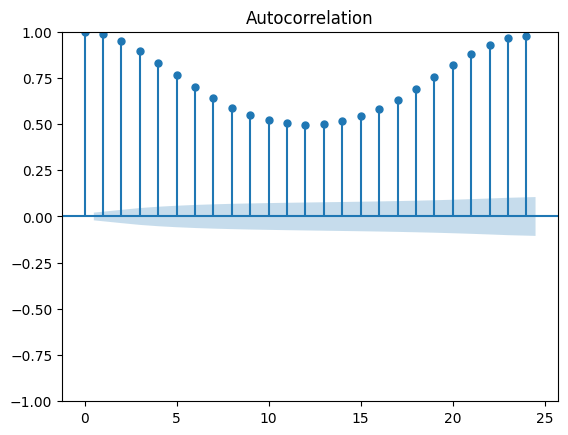

In [16]:
#plotting autocorrelation graph
plot_acf(train_data["TEMP"], lags=24, )
plt.show()

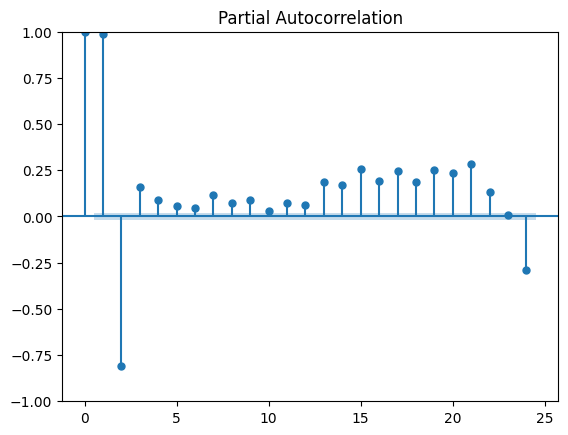

In [17]:
#plotting partial autocorrelation graph
plot_pacf(train_data["TEMP"], lags=24)
plt.show()

In [18]:
# SARIMA model parameters
order = (1, 1, 1)  # ARIMA parameters (p, d, q)
seasonal_order = (1, 1, 1, 24)  # SARIMA parameters (P, D, Q, S)

In [19]:
#to store RMSE after every year
rmse_record={}

In [20]:
# Fit SARIMA model
amritsar_model = SARIMAX(train_data["TEMP"], order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False, dates=train_data["Date"])
amritsar_result = amritsar_model.fit()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.55076D-01    |proj g|=  4.02103D-01


 This problem is unconstrained.



At iterate    5    f=  5.20316D-01    |proj g|=  3.52932D-01

At iterate   10    f=  4.97351D-01    |proj g|=  5.08188D-02

At iterate   15    f=  4.97005D-01    |proj g|=  5.19127D-03

At iterate   20    f=  4.96982D-01    |proj g|=  1.25132D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     29      1     0     0   1.251D-05   4.970D-01
  F =  0.49698199029739726     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [21]:
# Forecast temperatures for the next 48 hours
forecast = amritsar_result.get_forecast(steps=48)

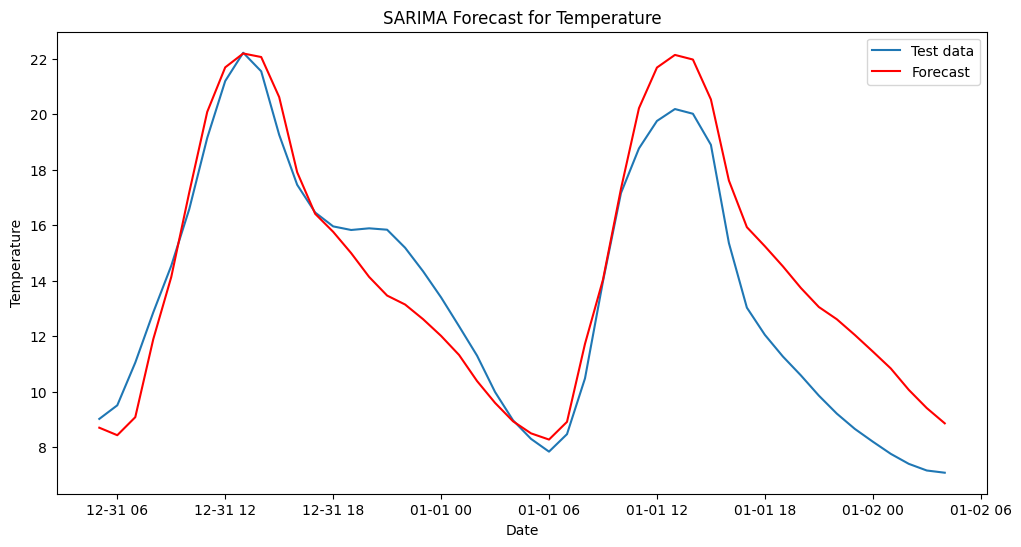

In [22]:
# Plot the predicted values along with the actual values
plt.figure(figsize=(12, 6))
#plt.plot(check.index, check["TEMP"], label='Train data')
plt.plot(test_data.index, test_data["TEMP"], label='Test data')
plt.plot(forecast.predicted_mean, label='Forecast', color='red')
#plt.plot(forecast.index, forecast.predicted_mean, label='Forecast', color='red')
#plt.fill_between(forecast.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.5)
plt.title('SARIMA Forecast for Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [23]:
rmse = np.sqrt(mean_squared_error(test_data["TEMP"], forecast.predicted_mean))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 1.83472255637933


In [24]:
rmse_record[1]=rmse

In [25]:
table=[8760*x for x in range(1, 21)]
#table

training now:  2


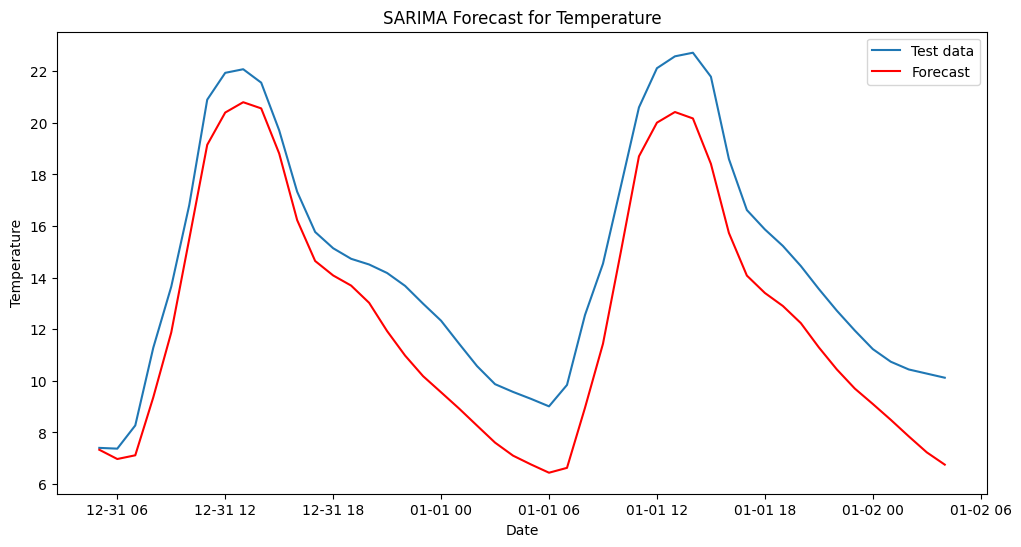

Root Mean Squared Error (RMSE): 2.2507210516932736
training now:  3


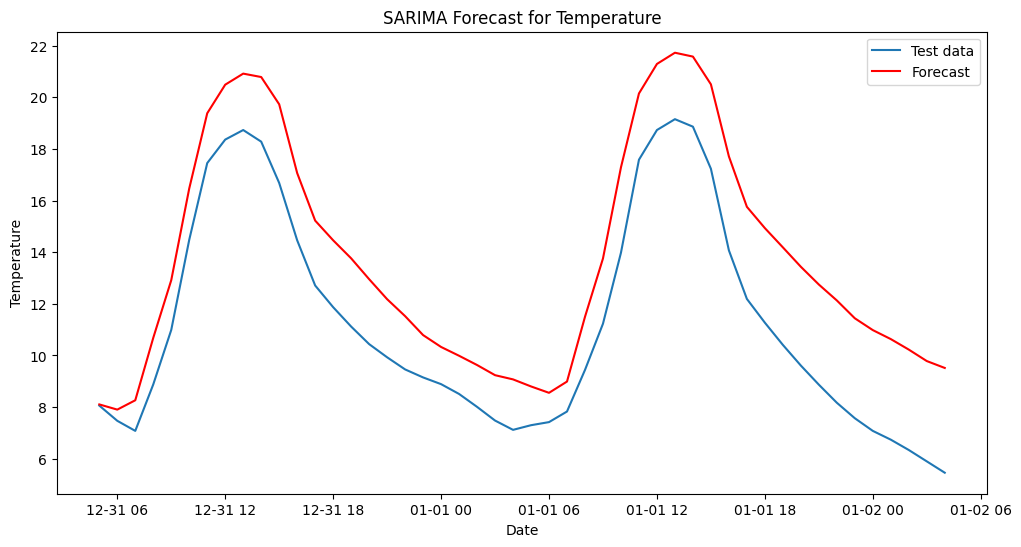

Root Mean Squared Error (RMSE): 2.720379883610116
training now:  4


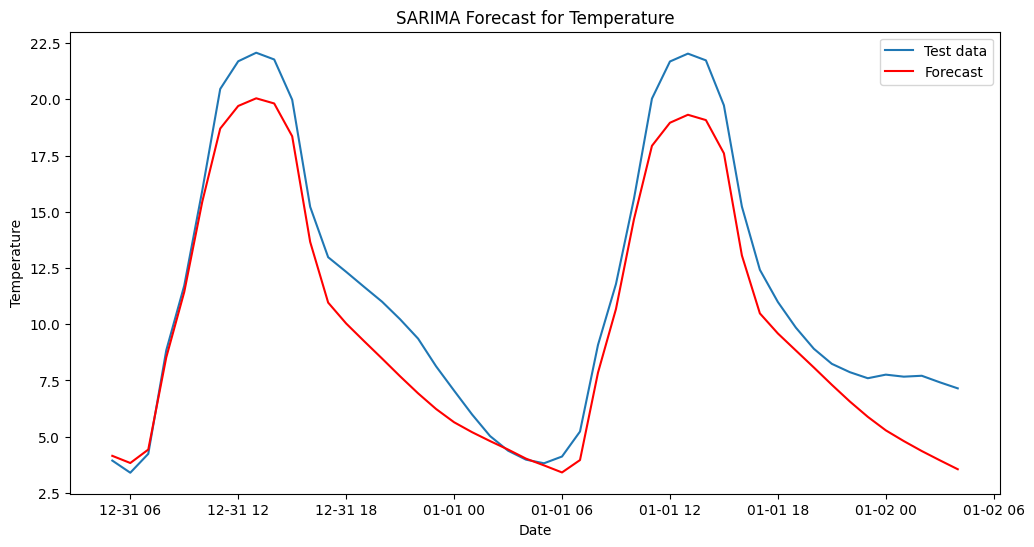

Root Mean Squared Error (RMSE): 1.856855409461828
training now:  5


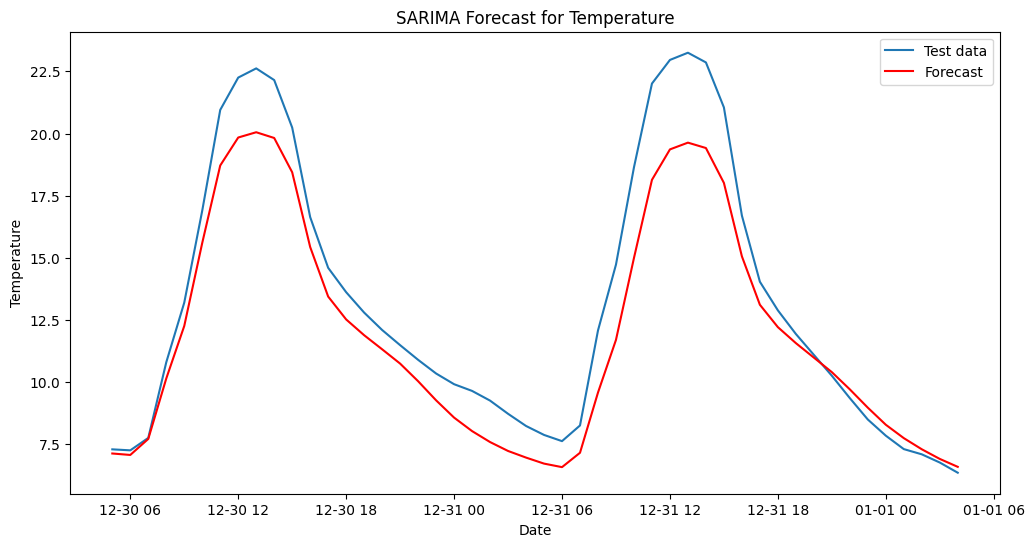

Root Mean Squared Error (RMSE): 1.7525562038251699
training now:  6


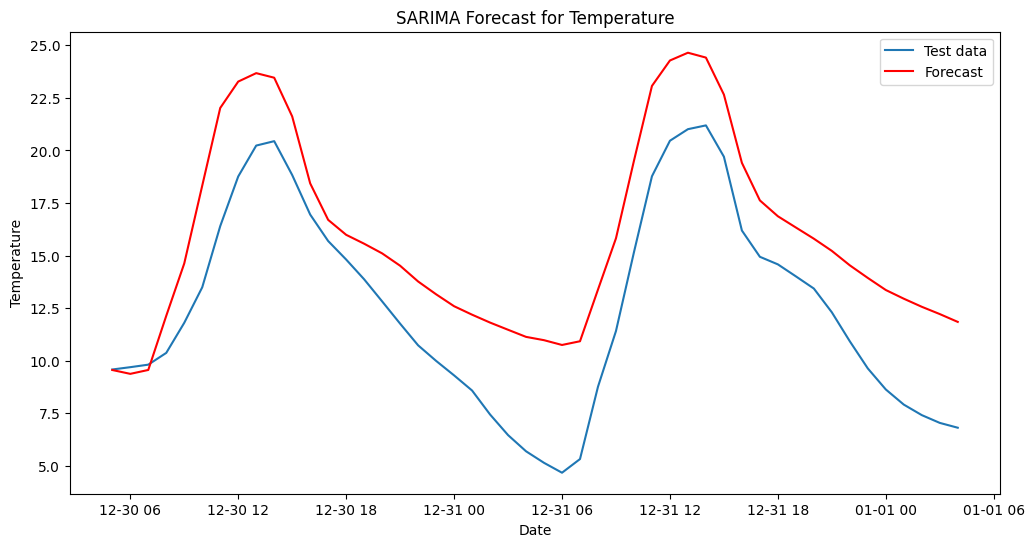

Root Mean Squared Error (RMSE): 3.764667806240279
training now:  7


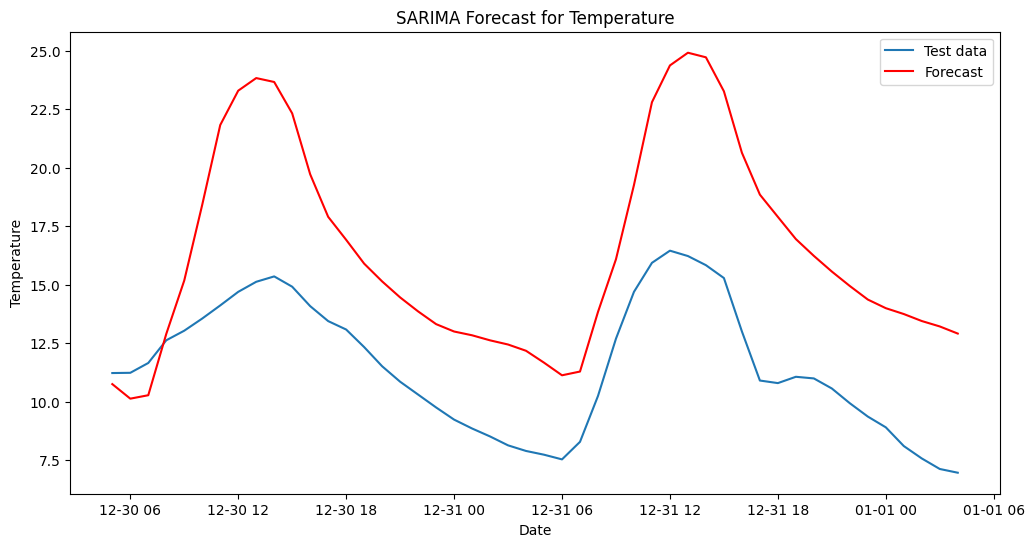

Root Mean Squared Error (RMSE): 5.52162975819673
training now:  8


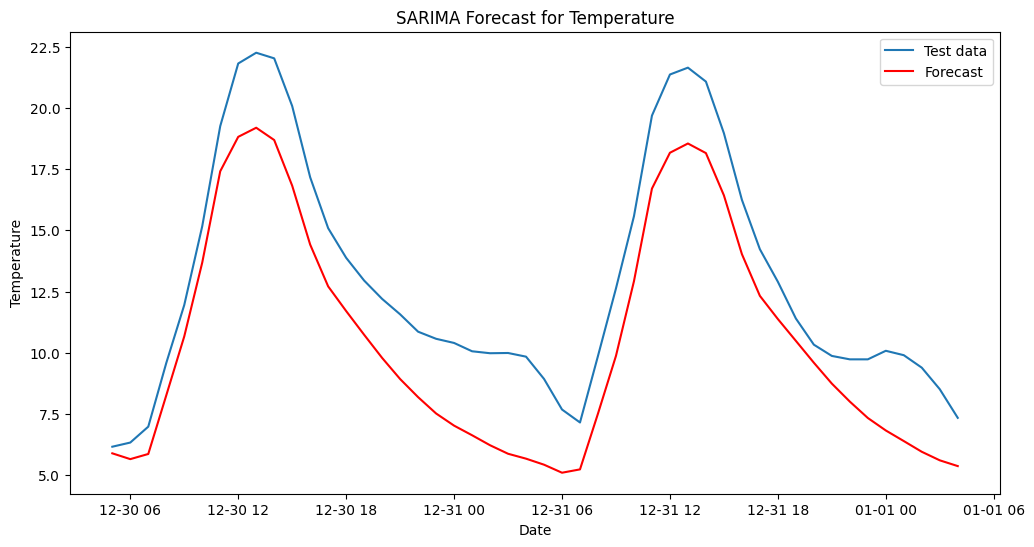

Root Mean Squared Error (RMSE): 2.6241444096330198
training now:  9


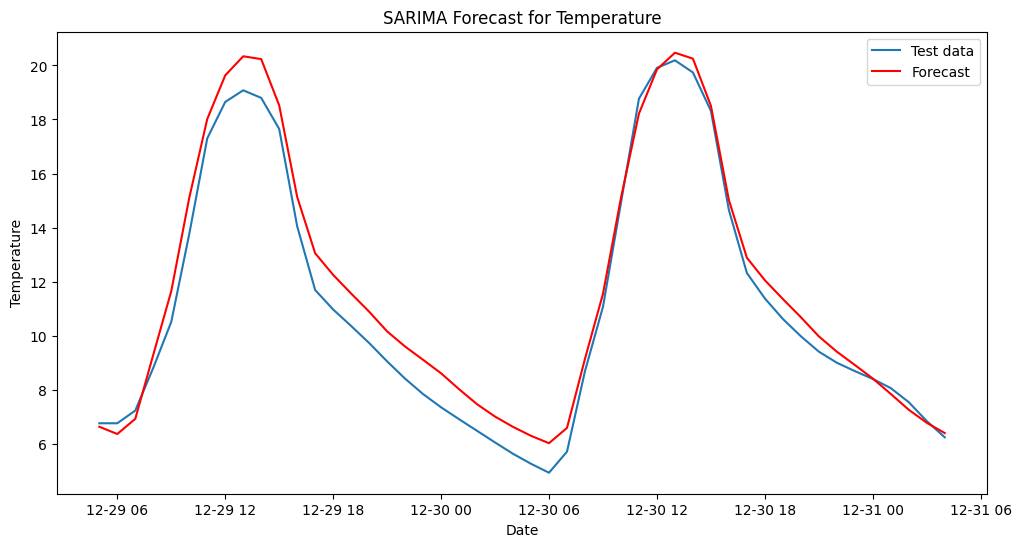

Root Mean Squared Error (RMSE): 0.8379999885546316
training now:  10


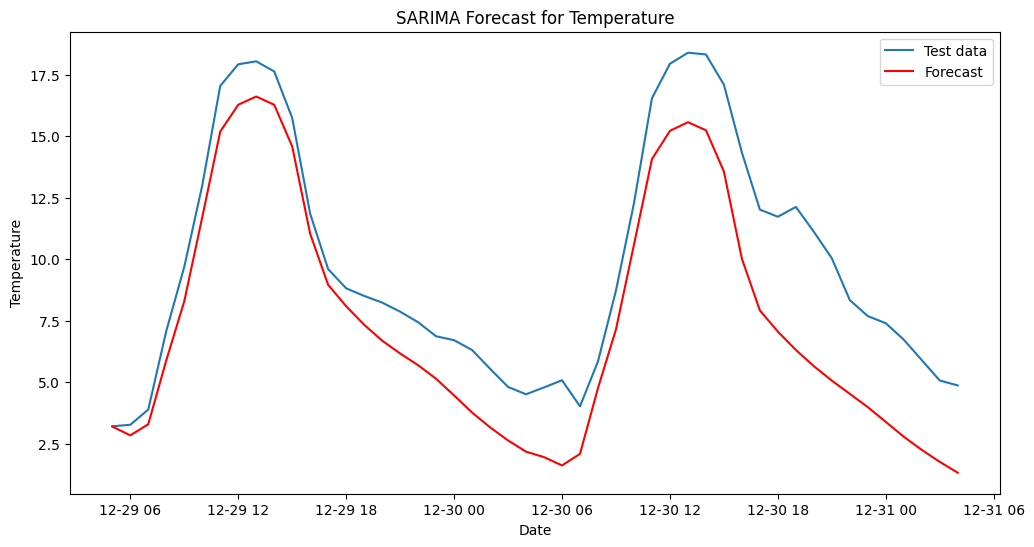

Root Mean Squared Error (RMSE): 2.794852485317702
training now:  11


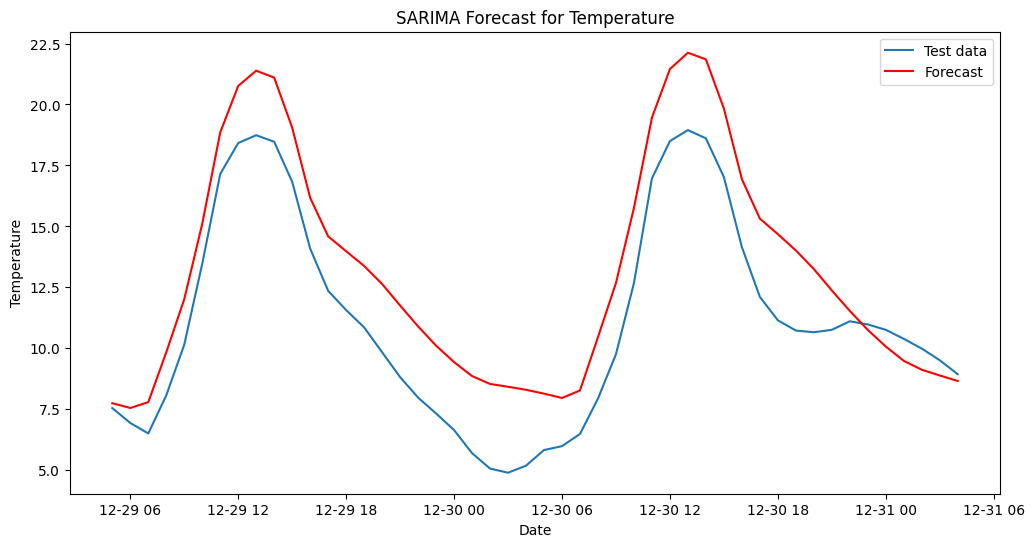

Root Mean Squared Error (RMSE): 2.407522311642052
training now:  12


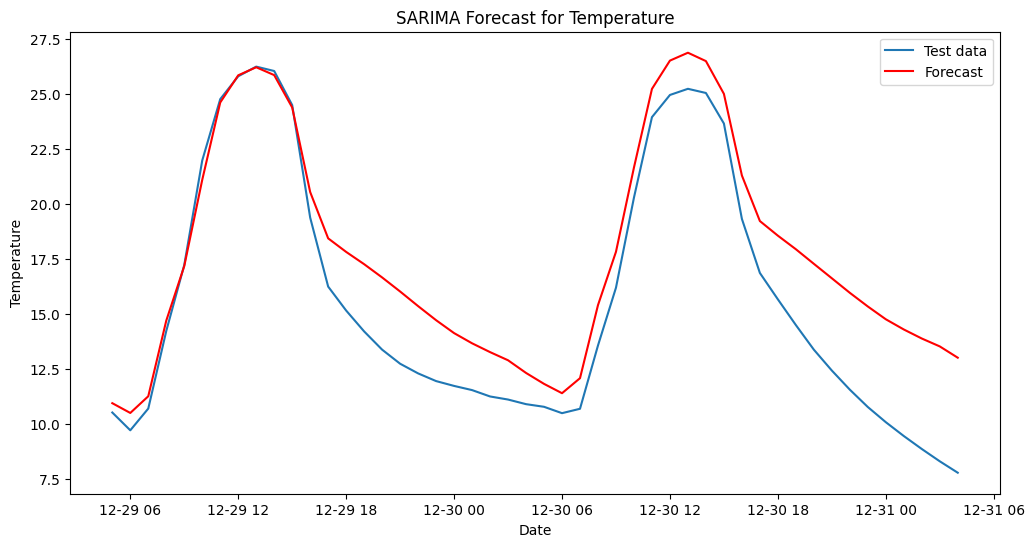

Root Mean Squared Error (RMSE): 2.6379225478115305
training now:  13


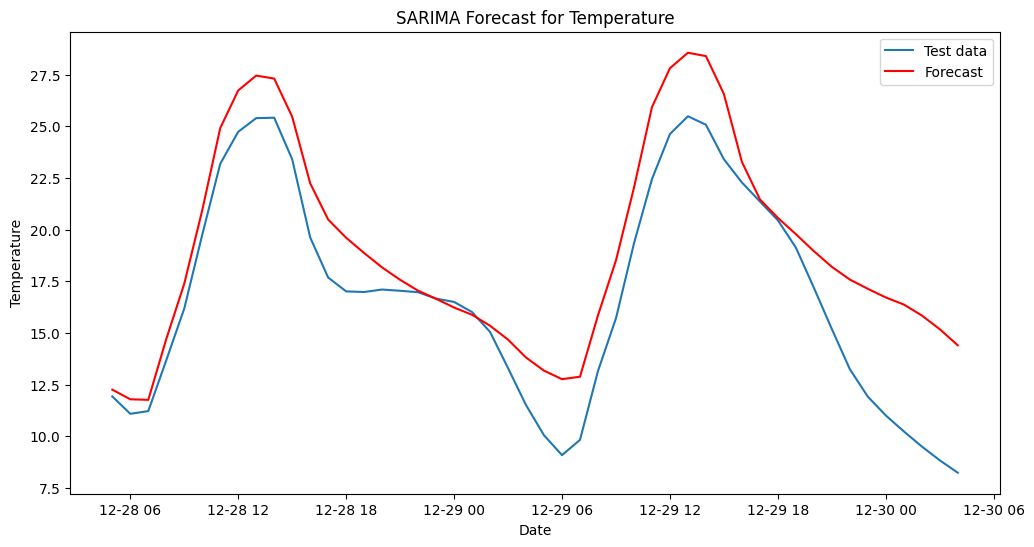

Root Mean Squared Error (RMSE): 2.9346645675890235
training now:  14


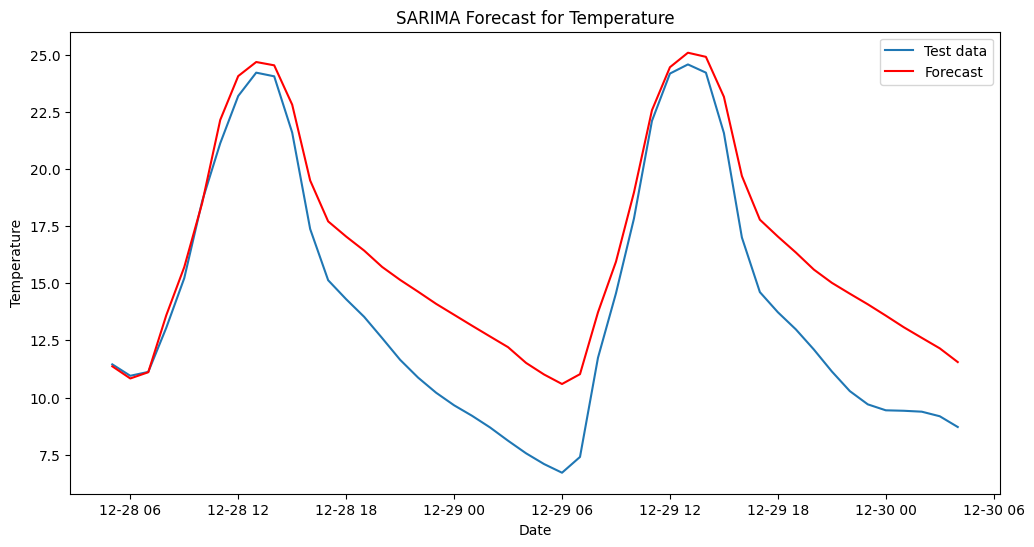

Root Mean Squared Error (RMSE): 2.8065779635085053
training now:  15


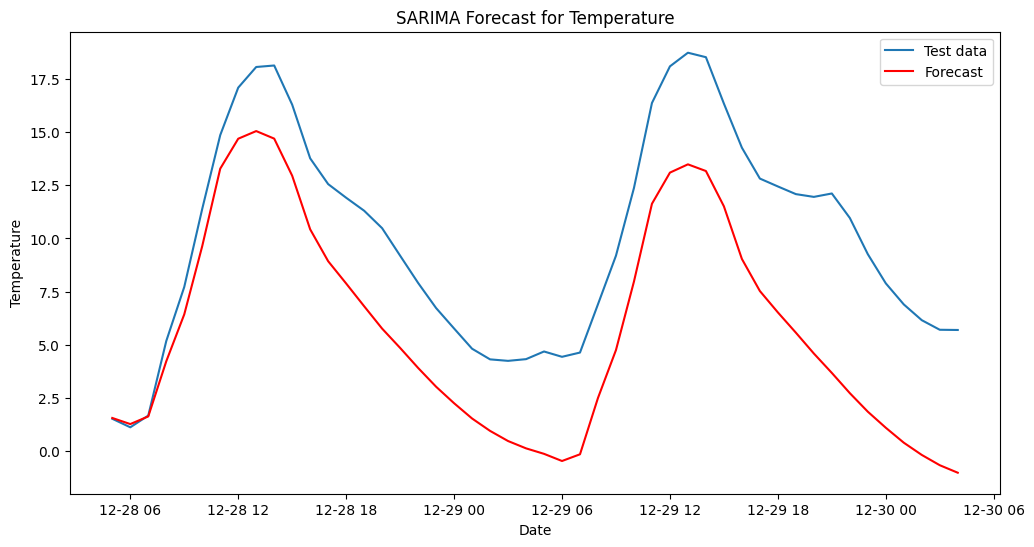

Root Mean Squared Error (RMSE): 4.768415744768807
training now:  16


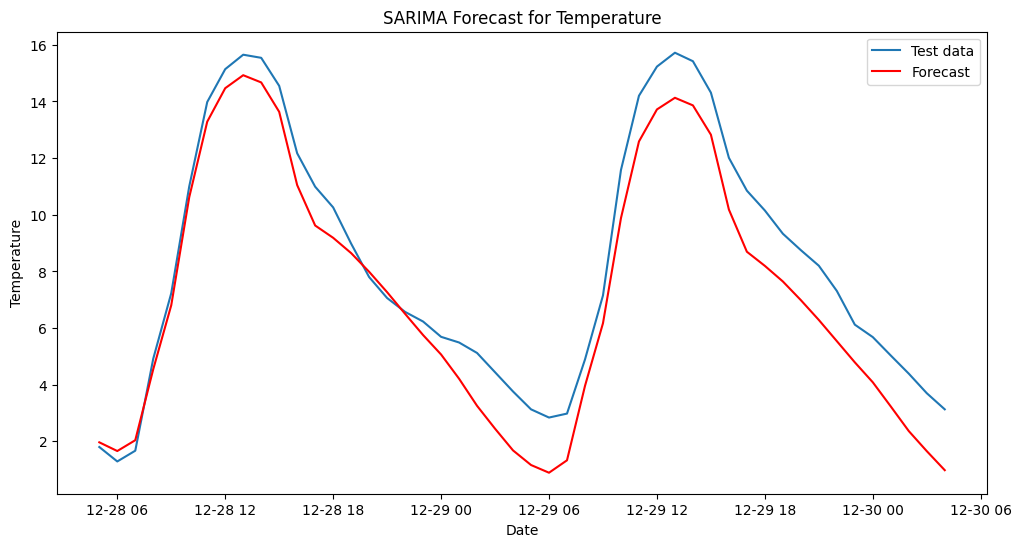

Root Mean Squared Error (RMSE): 1.4032404968855599
training now:  17


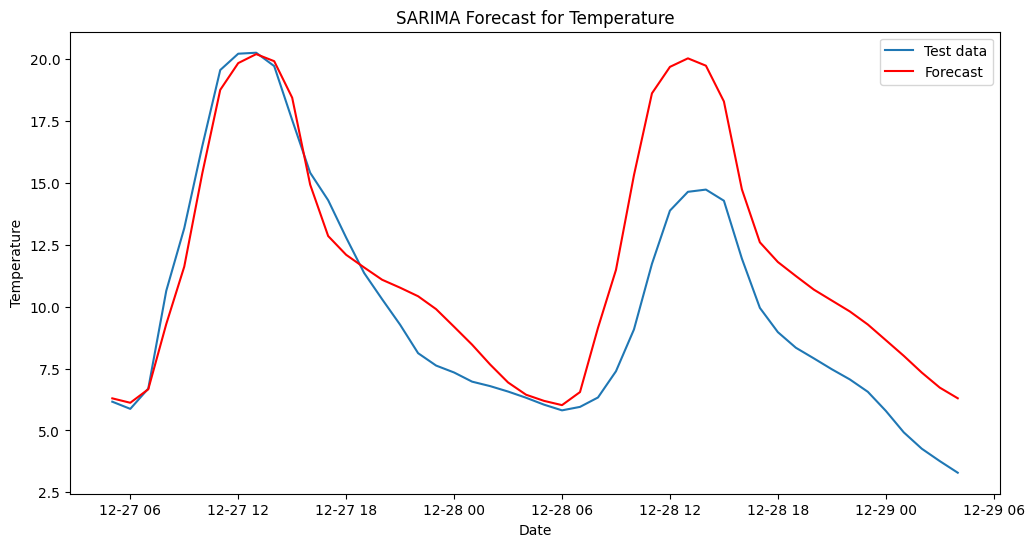

Root Mean Squared Error (RMSE): 2.708040966152986
training now:  18


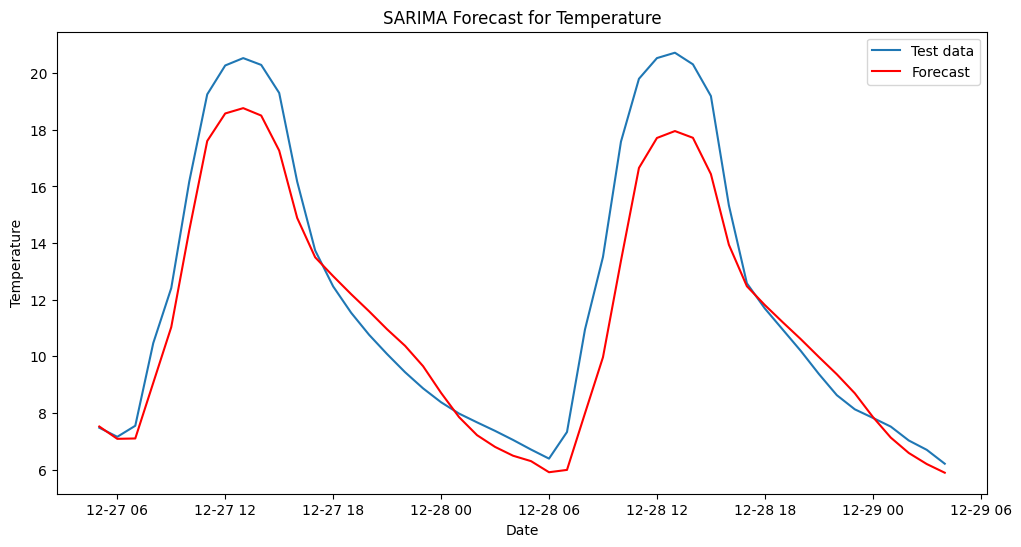

Root Mean Squared Error (RMSE): 1.5434450871860608
training now:  19


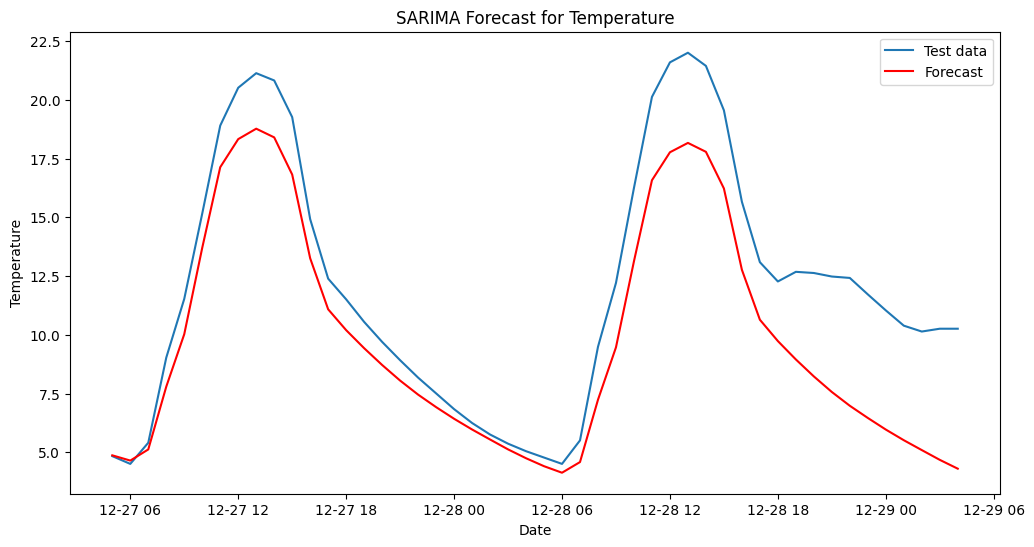

Root Mean Squared Error (RMSE): 2.9166441164402905
training now:  20


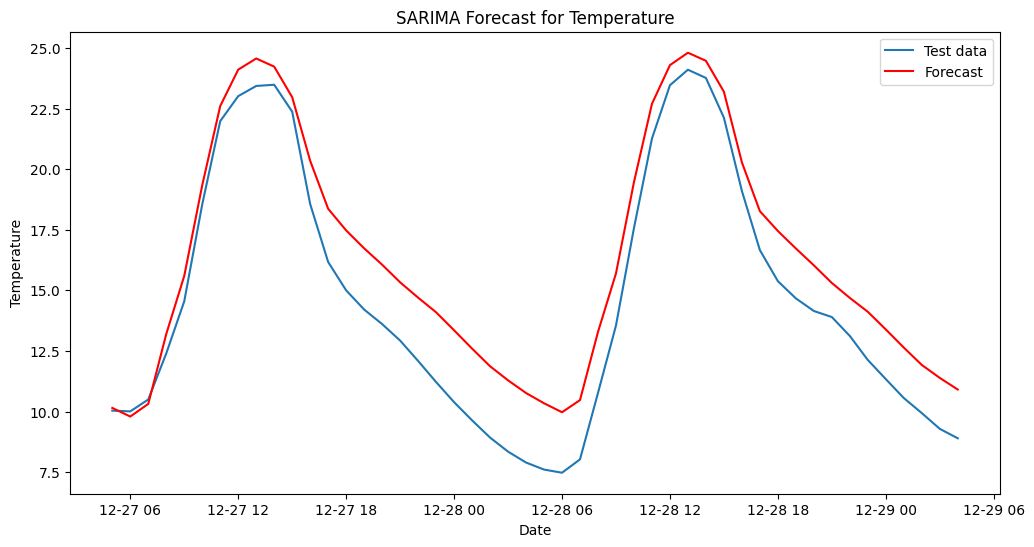

Root Mean Squared Error (RMSE): 1.9421113204829985


In [28]:
for i in range(2, 21):
    #check2=train_data[table[i-2]:table[i-1]]
    #test2=train_data[table[i-1]:table[i-1]+48] #2 days = 48 hours
    # Splitting data into train and test sets
    train_data = data[table[i-2]:table[i-1]]  # 1 year data
    test_data = data[table[i-1]:table[i-1]+48]   # Use the last 48 hours for testing
    print("training now: ", i)
    #training
    amritsar_result=amritsar_result.extend(train_data["TEMP"])
    #forecasting
    forecast2 = amritsar_result.get_forecast(steps=48)
    # Plot the predicted values along with the actual values
    plt.figure(figsize=(12, 6))
    plt.plot(test_data.index, test_data["TEMP"], label='Test data')
    plt.plot(forecast2.predicted_mean, label='Forecast', color='red')
    plt.title('SARIMA Forecast for Temperature')
    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.legend()
    plt.show()
    #RMSE
    rmse = np.sqrt(mean_squared_error(test_data["TEMP"], forecast2.predicted_mean))
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    # to store RMSE for every year
    rmse_record[i] = rmse

In [29]:
rmse_record

{1: 1.83472255637933,
 2: 2.2507210516932736,
 3: 2.720379883610116,
 4: 1.856855409461828,
 5: 1.7525562038251699,
 6: 3.764667806240279,
 7: 5.52162975819673,
 8: 2.6241444096330198,
 9: 0.8379999885546316,
 10: 2.794852485317702,
 11: 2.407522311642052,
 12: 2.6379225478115305,
 13: 2.9346645675890235,
 14: 2.8065779635085053,
 15: 4.768415744768807,
 16: 1.4032404968855599,
 17: 2.708040966152986,
 18: 1.5434450871860608,
 19: 2.9166441164402905,
 20: 1.9421113204829985}

In [30]:
forecast2.predicted_mean

2023-12-27 05:00:00    10.151224
2023-12-27 06:00:00     9.796710
2023-12-27 07:00:00    10.318802
2023-12-27 08:00:00    13.200841
2023-12-27 09:00:00    15.597734
2023-12-27 10:00:00    19.337509
2023-12-27 11:00:00    22.603448
2023-12-27 12:00:00    24.102816
2023-12-27 13:00:00    24.562883
2023-12-27 14:00:00    24.226328
2023-12-27 15:00:00    22.967429
2023-12-27 16:00:00    20.342747
2023-12-27 17:00:00    18.364122
2023-12-27 18:00:00    17.473708
2023-12-27 19:00:00    16.733637
2023-12-27 20:00:00    16.059192
2023-12-27 21:00:00    15.332304
2023-12-27 22:00:00    14.700214
2023-12-27 23:00:00    14.096547
2023-12-28 00:00:00    13.354456
2023-12-28 01:00:00    12.598346
2023-12-28 02:00:00    11.870273
2023-12-28 03:00:00    11.290793
2023-12-28 04:00:00    10.767331
2023-12-28 05:00:00    10.344217
2023-12-28 06:00:00     9.974530
2023-12-28 07:00:00    10.475008
2023-12-28 08:00:00    13.285153
2023-12-28 09:00:00    15.698859
2023-12-28 10:00:00    19.465719
2023-12-28

In [31]:
train_data=data[175200:]

In [32]:
amritsar_result=amritsar_result.extend(train_data["TEMP"])
forecast2 = amritsar_result.get_forecast(steps=48)


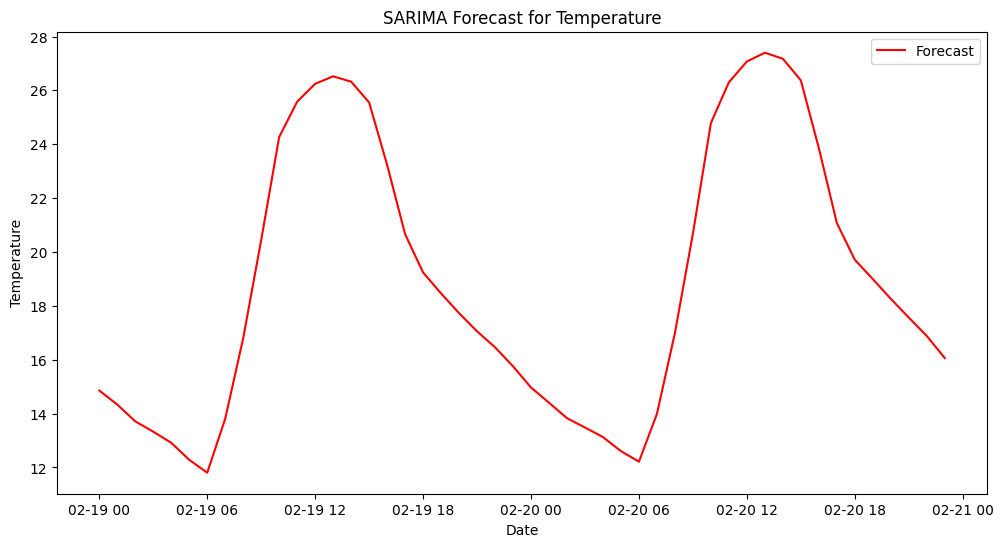

In [33]:
# Plot the predicted values along with the actual values
plt.figure(figsize=(12, 6))
#plt.plot(test_data.index, test_data["TEMP"], label='Test data')
plt.plot(forecast2.predicted_mean, label='Forecast', color='red')
plt.title('SARIMA Forecast for Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [34]:
#saving pickle file of model
with open("/kaggle/working/amritsar_model.pkl", 'wb') as f:
    pickle.dump(amritsar_result, f)

In [35]:
forecast2.predicted_mean

2024-02-19 00:00:00    14.853989
2024-02-19 01:00:00    14.333130
2024-02-19 02:00:00    13.708783
2024-02-19 03:00:00    13.326706
2024-02-19 04:00:00    12.913760
2024-02-19 05:00:00    12.280563
2024-02-19 06:00:00    11.802188
2024-02-19 07:00:00    13.807487
2024-02-19 08:00:00    16.799626
2024-02-19 09:00:00    20.443620
2024-02-19 10:00:00    24.269727
2024-02-19 11:00:00    25.580516
2024-02-19 12:00:00    26.245171
2024-02-19 13:00:00    26.522513
2024-02-19 14:00:00    26.323295
2024-02-19 15:00:00    25.551495
2024-02-19 16:00:00    23.234006
2024-02-19 17:00:00    20.660529
2024-02-19 18:00:00    19.236917
2024-02-19 19:00:00    18.459393
2024-02-19 20:00:00    17.726822
2024-02-19 21:00:00    17.052012
2024-02-19 22:00:00    16.459299
2024-02-19 23:00:00    15.754607
2024-02-20 00:00:00    14.966178
2024-02-20 01:00:00    14.402143
2024-02-20 02:00:00    13.826970
2024-02-20 03:00:00    13.481503
2024-02-20 04:00:00    13.124873
2024-02-20 05:00:00    12.603425
2024-02-20